In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [157]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [158]:
airline=pd.read_excel("Airlines+Data.xlsx")
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [159]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [160]:
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [161]:
airline.shape

(96, 2)

In [162]:
airline["Passengers"].describe()

count     96.000000
mean     213.708333
std       71.918216
min      104.000000
25%      156.000000
50%      200.000000
75%      264.750000
max      413.000000
Name: Passengers, dtype: float64

In [163]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<Axes: >

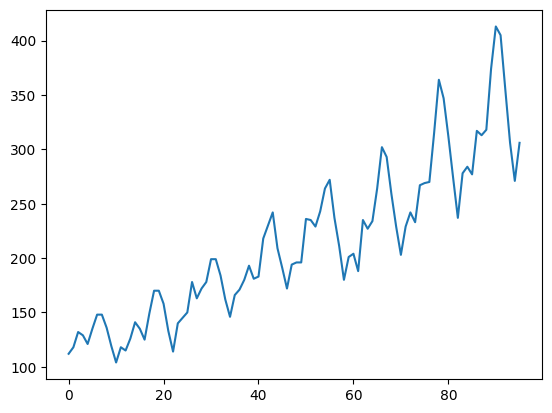

In [164]:
airline['Passengers'].plot()

In [165]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [166]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #SES
from statsmodels.tsa.holtwinters import Holt #Holt Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

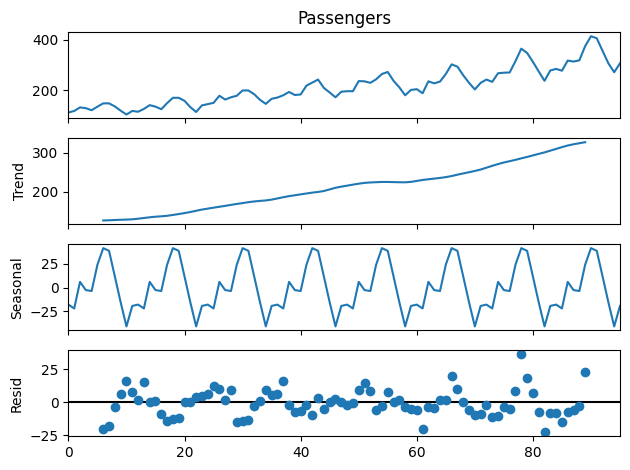

In [167]:
decompose_ts_add=seasonal_decompose(airline.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# Splitting data

In [168]:
Train=airline.head(84)
Test=airline.tail(12) #always minus 12 on total number of column

# Moving Average[to get the trend we are doing MA]

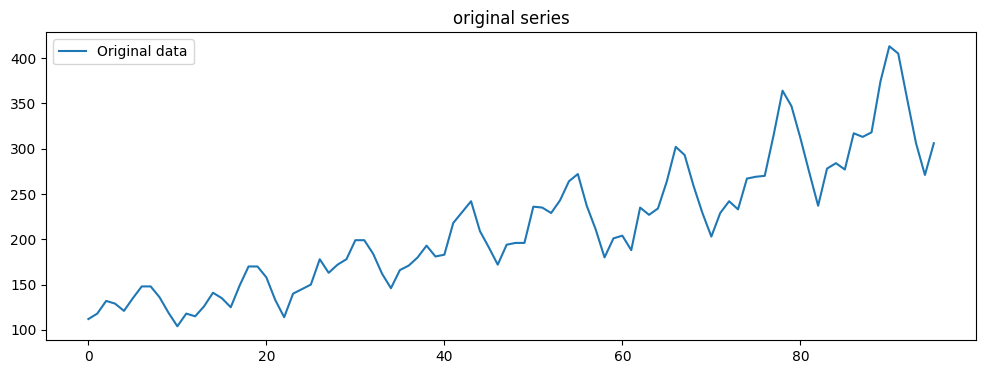

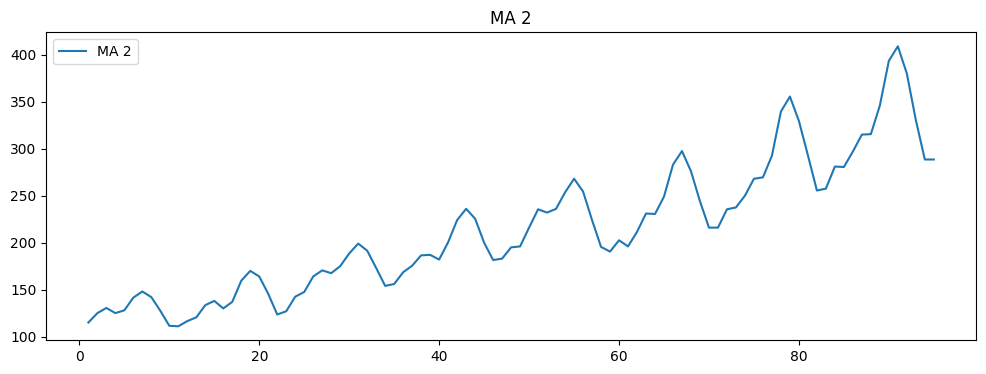

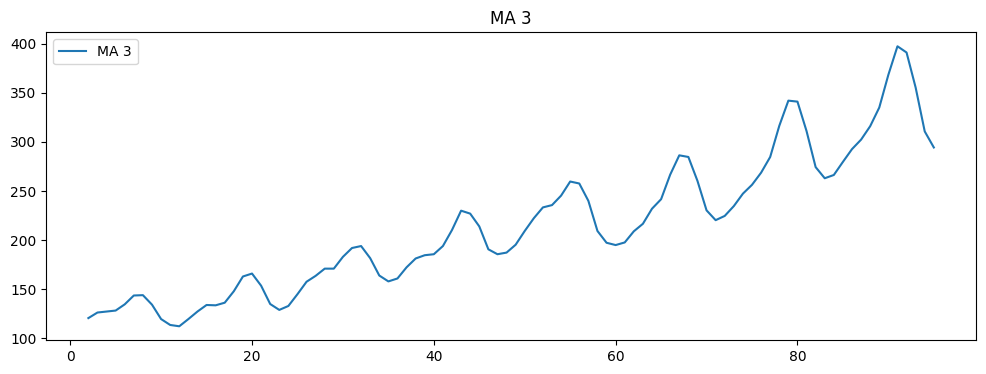

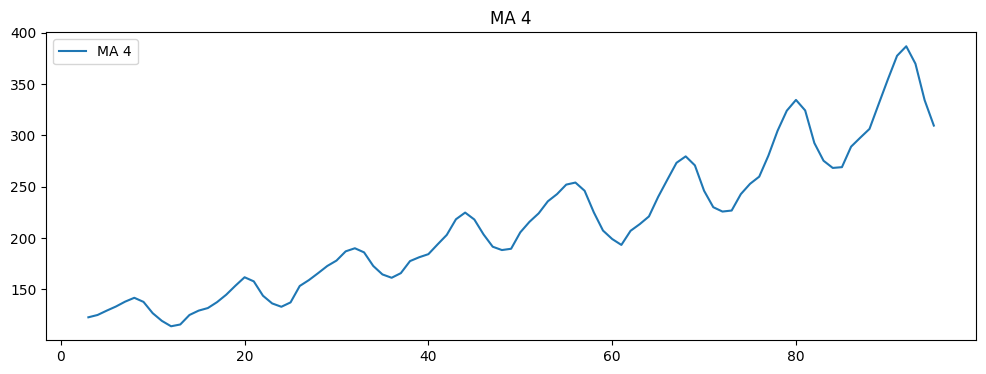

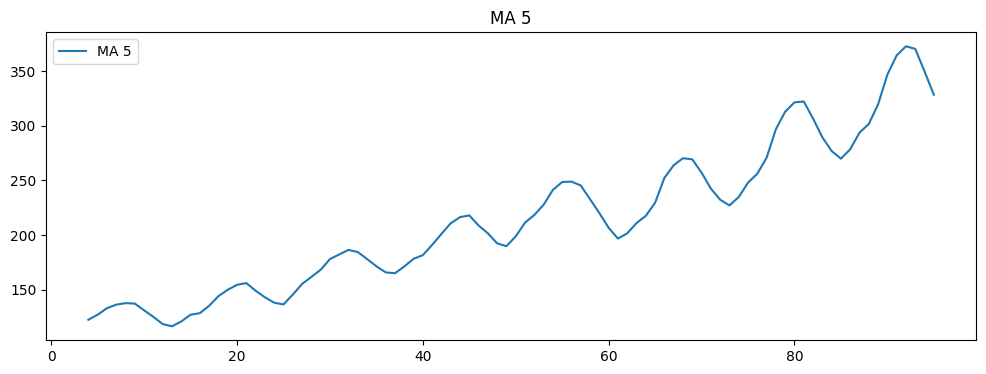

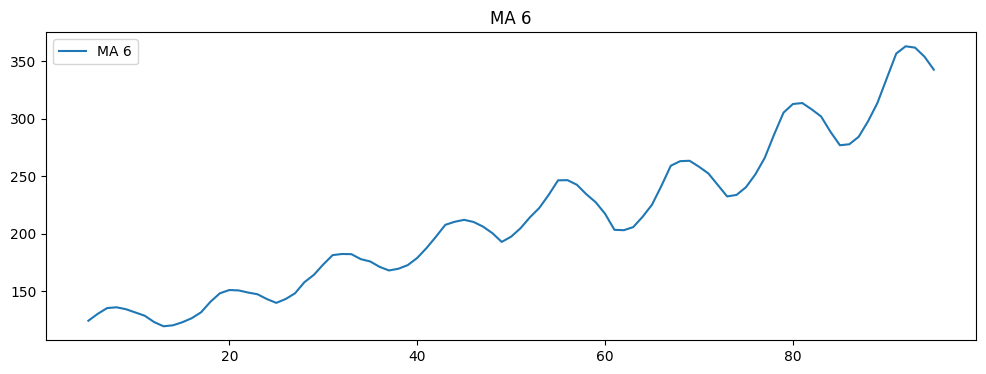

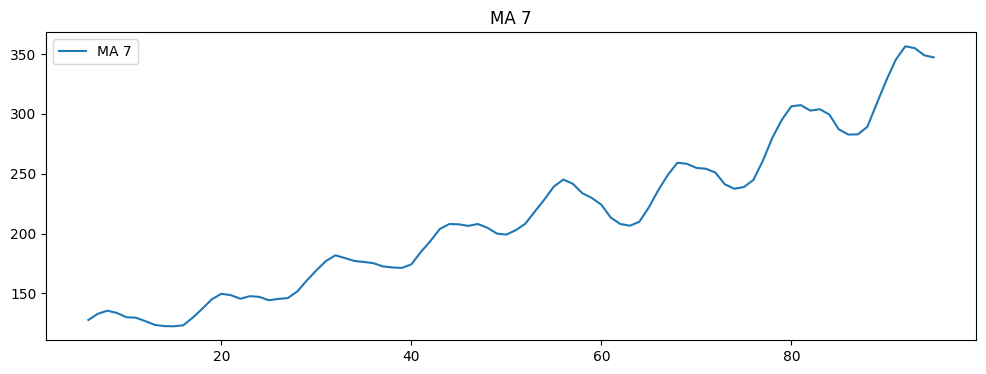

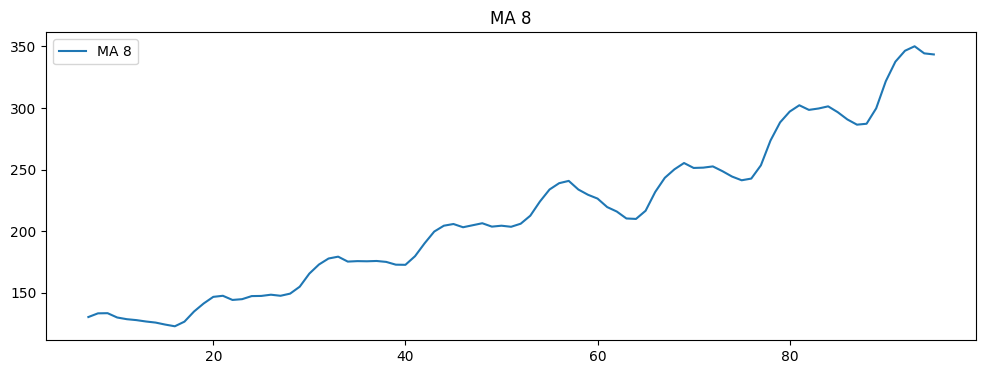

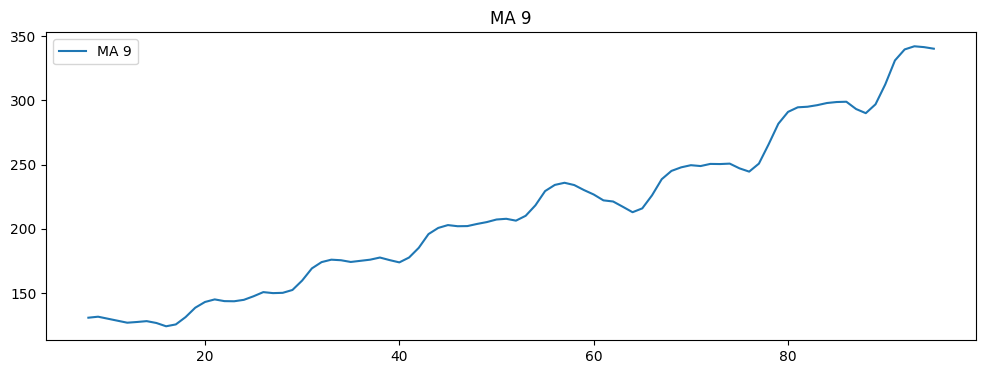

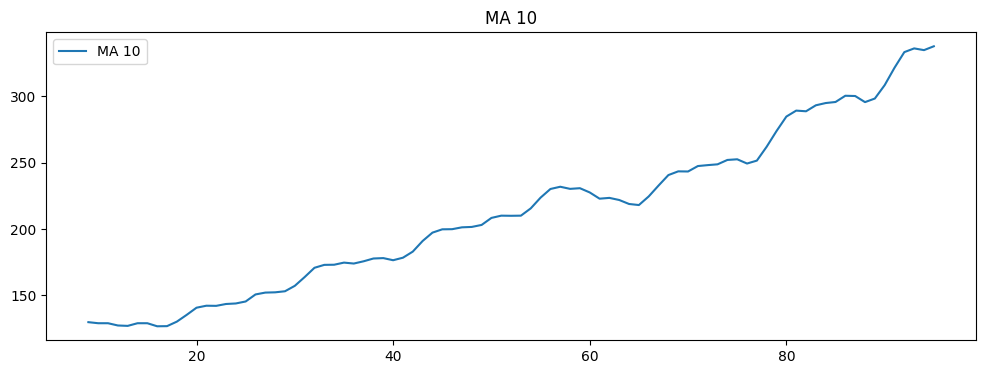

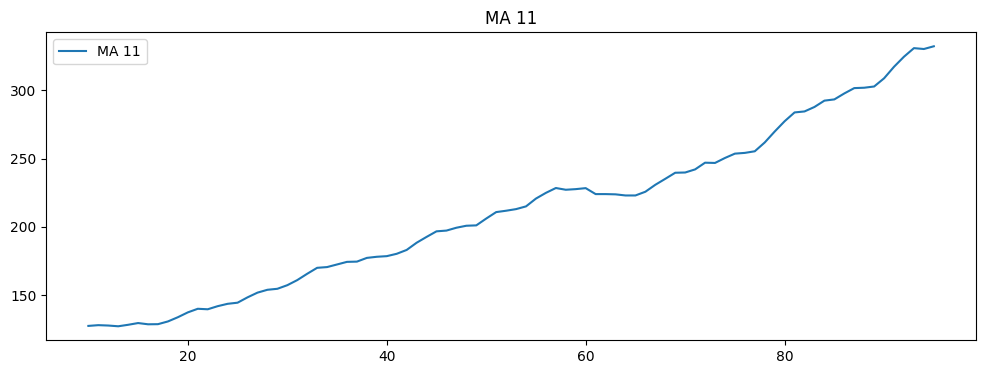

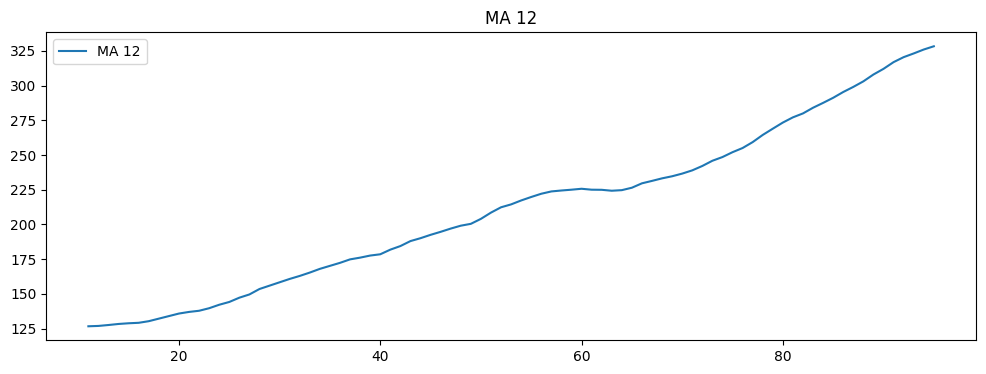

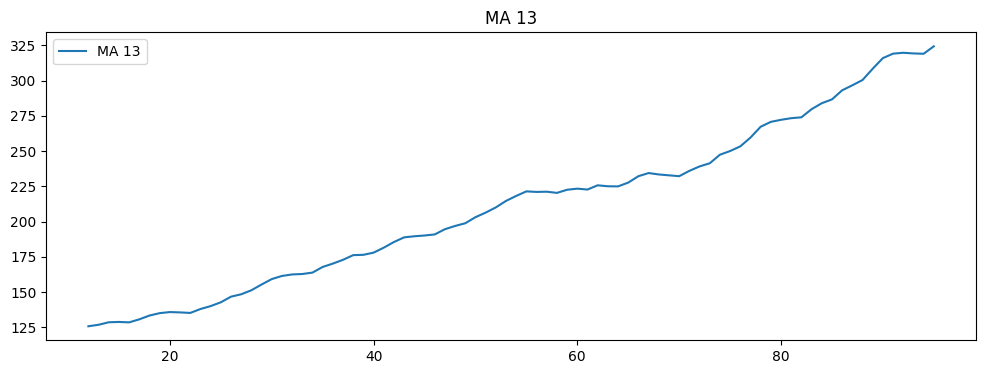

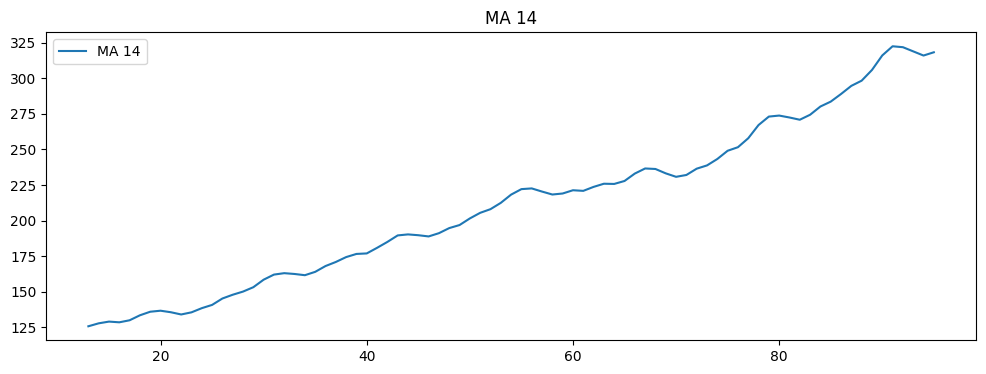

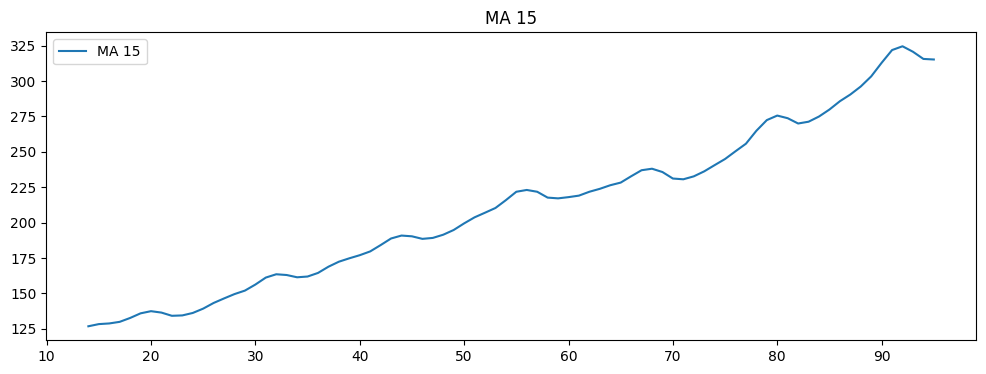

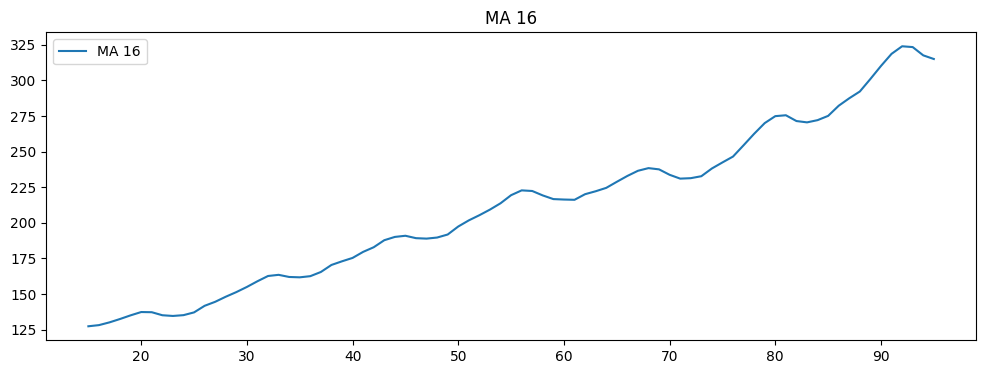

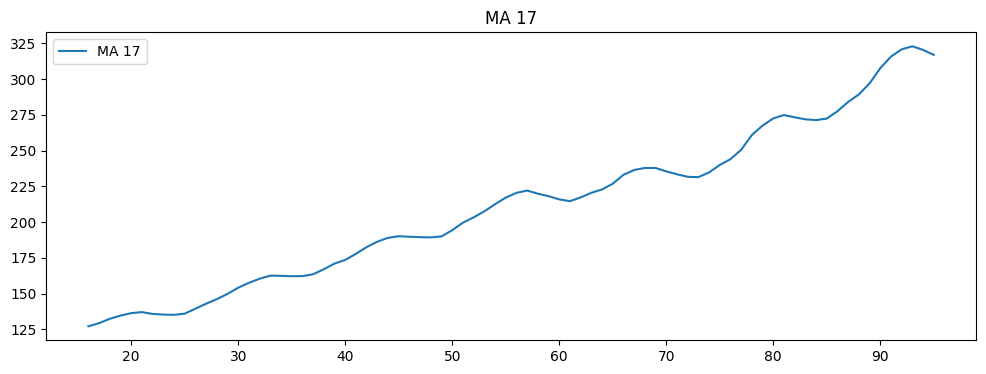

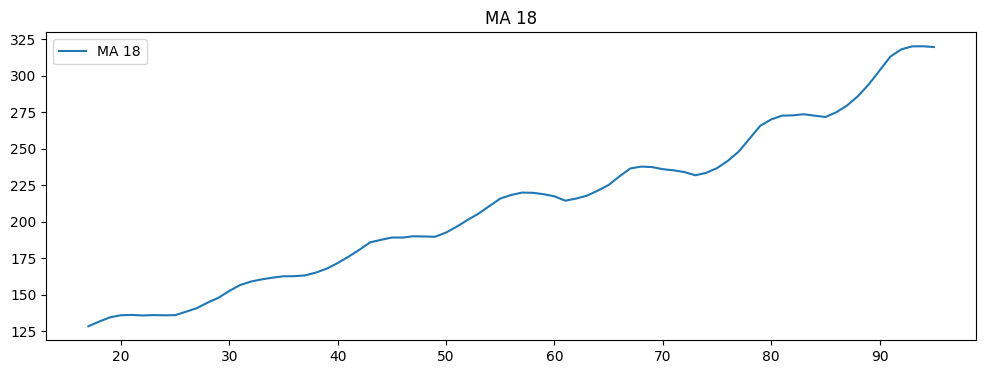

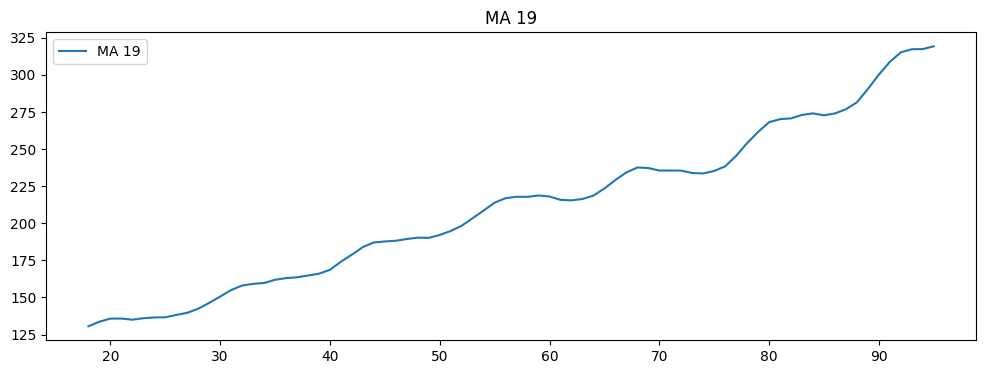

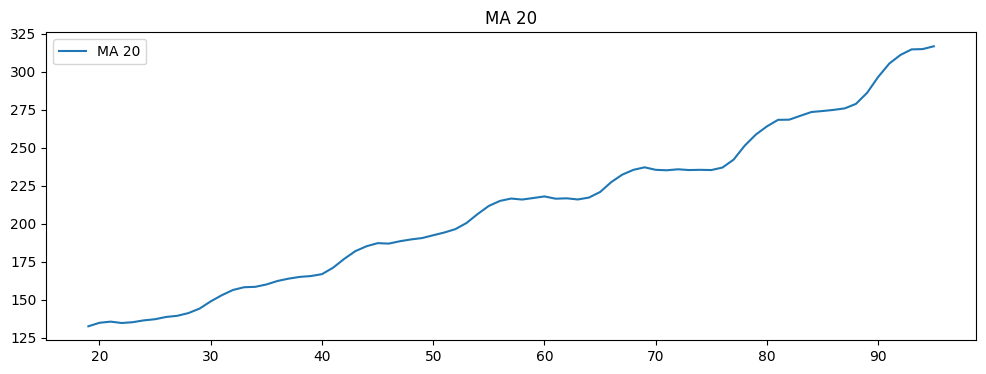

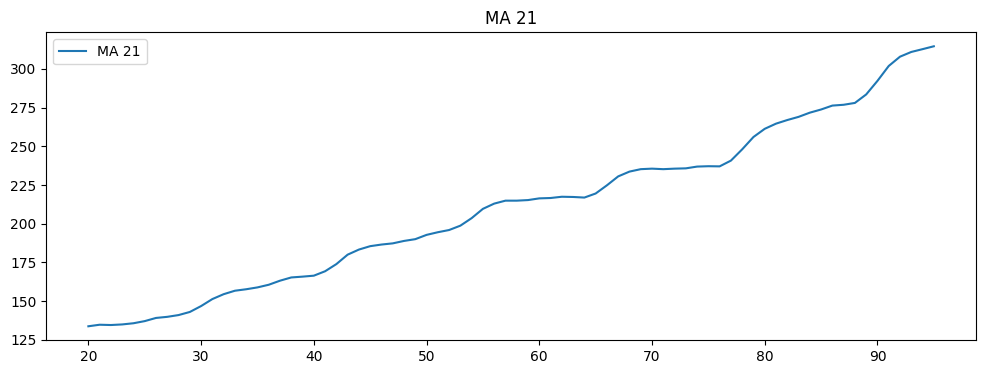

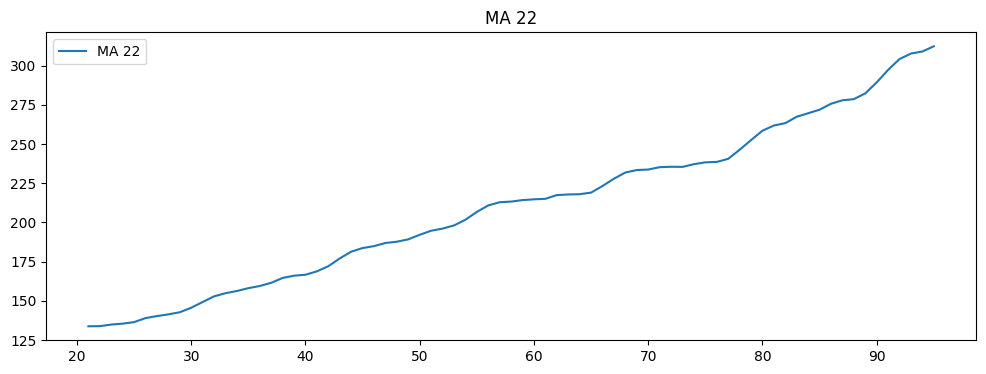

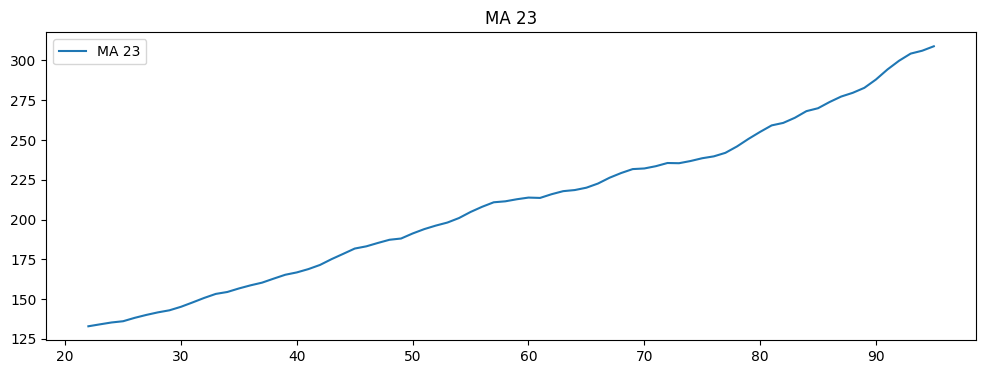

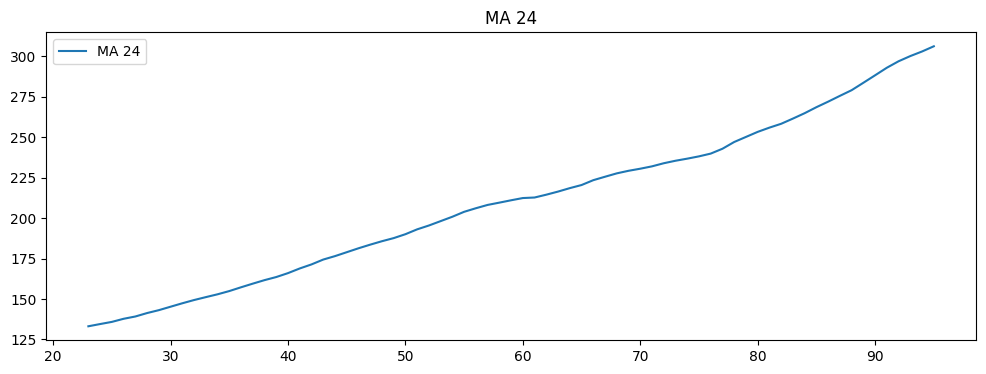

In [169]:
plt.figure(figsize=(12,4))
airline.Passengers.plot(label="Original data")
plt.legend(loc='best')
plt.title('original series')

for i in range(2,25):
    plt.figure(figsize=(12,4))
    
    airline["Passengers"].rolling(i).mean().plot(label="MA "+str(i))
    plt.title('MA '+str(i))
    plt.legend(loc='best')
    plt.show()

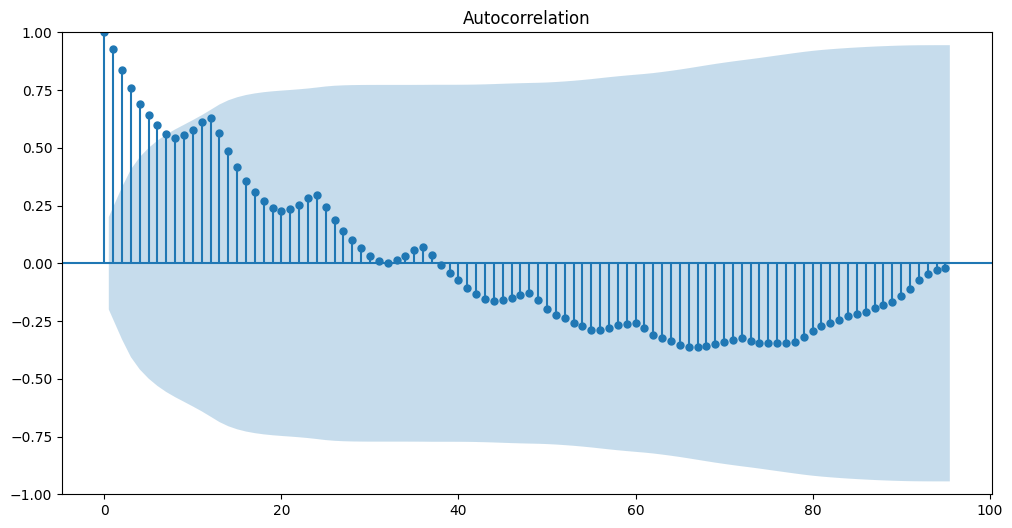

In [170]:
import statsmodels.graphics.tsaplots as tsa_plots
fig, ax = plt.subplots(figsize=(12, 6))
tsa_plots.plot_acf(airline.Passengers, lags=95, ax=ax)
plt.show()

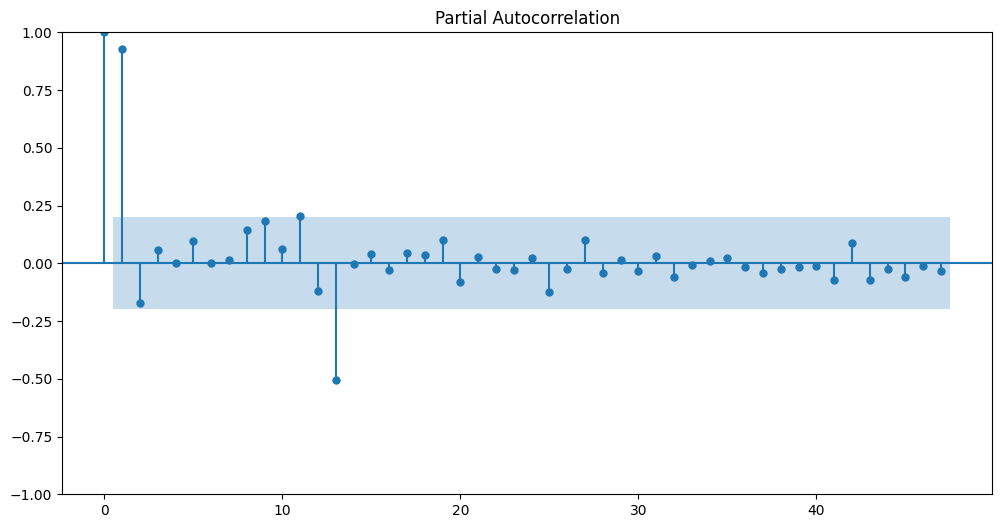

In [171]:
import statsmodels.graphics.tsaplots as tsa_plots
fig, ax = plt.subplots(figsize=(12, 6))
tsa_plots.plot_pacf(airline.Passengers, lags=47, ax=ax)
plt.show()

# Evaluation Matric MAPE

In [172]:
def MAPE(y_true, y_pred):
    return (abs((y_true - y_pred) / y_true)).mean() * 100

In [173]:
Train["Passengers"]

0     112
1     118
2     132
3     129
4     121
     ... 
79    347
80    312
81    274
82    237
83    278
Name: Passengers, Length: 84, dtype: int64

In [174]:
Test.index[0]

84

In [175]:
Test.index[-1]

95

# Simple Exponential Method

In [176]:
ses_model=SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
mape = MAPE(Test["Passengers"], pred_ses)
print("MAPE:", mape)

MAPE: 13.411274758932686


In [177]:
print(pred_ses)

84    282.369838
85    282.369838
86    282.369838
87    282.369838
88    282.369838
89    282.369838
90    282.369838
91    282.369838
92    282.369838
93    282.369838
94    282.369838
95    282.369838
dtype: float64


In [178]:
import numpy as np
x=np.linspace(0.1,1,20)
for i in x:
    ses_model=SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=i)
    pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
    score=MAPE(pred_ses,Test.Passengers)
    print('smoothing_level',i,"-->","MAPE Error",score)

smoothing_level 0.1 --> MAPE Error 20.96666748611
smoothing_level 0.1473684210526316 --> MAPE Error 18.171476314471878
smoothing_level 0.19473684210526315 --> MAPE Error 17.279619559023864
smoothing_level 0.24210526315789474 --> MAPE Error 17.15839305549272
smoothing_level 0.2894736842105263 --> MAPE Error 17.466697585080095
smoothing_level 0.33684210526315794 --> MAPE Error 18.005901343074378
smoothing_level 0.38421052631578945 --> MAPE Error 18.64327933208375
smoothing_level 0.43157894736842106 --> MAPE Error 19.36810480833717
smoothing_level 0.4789473684210527 --> MAPE Error 20.06439255764622
smoothing_level 0.5263157894736842 --> MAPE Error 20.638563665790045
smoothing_level 0.5736842105263158 --> MAPE Error 21.06094922288032
smoothing_level 0.6210526315789474 --> MAPE Error 21.34913632808024
smoothing_level 0.6684210526315789 --> MAPE Error 21.4553161379865
smoothing_level 0.7157894736842105 --> MAPE Error 21.37825618785394
smoothing_level 0.7631578947368421 --> MAPE Error 21.1334

In [179]:
#Holt Method
hw_model=Holt(Train["Passengers"]).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hw,Test.Passengers)

33.788331355358594

In [180]:
pred_hw

84    265.922963
85    262.336588
86    258.750213
87    255.163838
88    251.577463
89    247.991088
90    244.404713
91    240.818338
92    237.231963
93    233.645588
94    230.059213
95    226.472838
dtype: float64

In [181]:
import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas:
    for j in betas:
        hw_model=Holt(Train["Passengers"]).fit(smoothing_level=i,smoothing_slope=j)
        pred_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])
        score=MAPE(pred_hw,Test.Passengers)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 11.752127771684718
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 10.975195406935551
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 11.344175618848439
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 11.735144071564168
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 11.982821028536799
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 12.056290809427932
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 11.84853067250581
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 11.509738182168865
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 11.303628954909172
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 11.355680627464135
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 11.505705470063678
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 11.056966370515841
smoothing_level  0.19  smoothing_s

In [182]:
a=pd.DataFrame(l,columns=["aplha","beta","score"])
a.sort_values(["score"])

,aplha,beta,score
1,0.10,0.19,10.975195
11,0.19,0.19,11.056966
12,0.19,0.28,11.166601
8,0.10,0.82,11.303629
2,0.10,0.28,11.344176
...,...,...,...
49,0.46,0.91,826.936017
47,0.46,0.73,858.326625
46,0.46,0.64,1304.676022
37,0.37,0.73,1611.465552


# Holts winter exponential smoothing with additive seasonality and additive trend

In [184]:
hwe_model_add_add=ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

6.381025370420128

# Final model by combining train and test

In [185]:
hwe_model_add_add=ExponentialSmoothing(airline["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [186]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     319.235270
97     311.528386
98     350.278691
99     346.984976
100    351.845022
101    403.925707
102    440.566797
103    427.446477
104    376.628169
105    329.767502
dtype: float64